# Data Analysis

### Load the dataset

In [10]:
import math
import statistics as st
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
bike_buyers = pd.read_csv("bike_buyers.csv")
bike_buyers.columns = ["ID","Marital_Status","Gender","Income","Children","Education","Occupation","Home_Owners","Cars", "Commute_Distance","Region","Age","Purchased_Bike"]

In [3]:
bike_buyers.head(10)

,ID,Marital_Status,Gender,Income,Children,Education,Occupation,Home_Owners,Cars,Commute_Distance,Region,Age,Purchased_Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
5,13507,Married,Female,10000.0,2.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,50.0,No
6,27974,Single,Male,160000.0,2.0,High School,Management,NaN,4.0,0-1 Miles,Pacific,33.0,Yes
7,19364,Married,Male,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,43.0,Yes
8,22155,NaN,Male,20000.0,2.0,Partial High School,Clerical,Yes,2.0,5-10 Miles,Pacific,58.0,No
9,19280,Married,Male,NaN,2.0,Partial College,Manual,Yes,1.0,0-1 Miles,Europe,NaN,Yes


In [4]:
bike_buyers.tail()

,ID,Marital_Status,Gender,Income,Children,Education,Occupation,Home_Owners,Cars,Commute_Distance,Region,Age,Purchased_Bike
995,23731,Married,Male,60000.0,2.0,High School,Professional,Yes,2.0,2-5 Miles,North America,54.0,Yes
996,28672,Single,Male,70000.0,4.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,35.0,Yes
997,11809,Married,NaN,60000.0,2.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,North America,38.0,Yes
998,19664,Single,Male,100000.0,3.0,Bachelors,Management,No,3.0,1-2 Miles,North America,38.0,No
999,12121,Single,Male,60000.0,3.0,High School,Professional,Yes,2.0,10+ Miles,North America,53.0,Yes


#### Interesting dataset
The data represents the details of a specific group of people who purchased or id not purchase the bike. While skimming through the datasets and their features, it will be interesting to see whether age or income have any impact on purchasing the bike. Also, does occupation or education influence the bike purchase? Does the homeowners purchase more bike or does the number of cars that people have any influence when it comes to purchasing a bike? Also, does people who have less commute distance purchased more bike? does having more children impact bike purchasing? These are all the analysis that will be interesting to check with the given datasets.
Link : https://www.kaggle.com/heeraldedhia/bike-buyers


### Cleaning the dataset

In [5]:
# Fill the missing Marital_Status as Married if the person have children and single if doesnt have any children
bike_buyers.loc[bike_buyers.Marital_Status.isna() & bike_buyers.Children > 0,"Marital_Status"] = "Married"
bike_buyers.loc[bike_buyers.Marital_Status.isna(),"Marital_Status"] = "Single"

# Fill the income with median value
good_income = [income for income in bike_buyers.Income if not math.isnan(income)]
median_income = st.median(good_income)
bike_buyers["Income"].fillna(value = median_income, inplace=True)

# Fill missing values for number of children to 0 for NaN values
bike_buyers["Children"] = bike_buyers["Children"].replace(np.nan,0)

# Fill missing home owner values to No
bike_buyers["Home_Owners"] = bike_buyers["Home_Owners"].replace(np.nan,"No")

# Fill missing car values to 0
bike_buyers["Cars"] = bike_buyers["Cars"].replace(np.nan,0)

In [6]:
#dropped the rows for which age and gender is not given
Buyers_Count = len(bike_buyers.ID)
bike_buyers = bike_buyers.dropna(subset=["Age","Gender"])  
Buyers_Count_good = len(bike_buyers.ID)

print(f"Rows before cleaning: {Buyers_Count}\nRows after cleaning : {Buyers_Count_good}")

Rows before cleaning: 1000
Rows after cleaning : 982


In [55]:
bike_buyers.Cars = bike_buyers.Cars.astype(int)
bike_buyers.Children = bike_buyers.Children.astype(int)
bike_buyers.head()

,ID,Marital_Status,Gender,Income,Children,Education,Occupation,Home_Owners,Cars,Commute_Distance,Region,Age,Purchased_Bike
0,12496,Married,Female,40000.0,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5,Partial College,Professional,No,2,2-5 Miles,Europe,60.0,No
4,25597,Single,Male,30000.0,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36.0,Yes
5,13507,Married,Female,10000.0,2,Partial College,Manual,Yes,0,1-2 Miles,Europe,50.0,No


#### **Cleaning data sets**
This dataset has some missing values in several columns such as Marital Status, Gender, Income, Children, Homeowners, cars and age, which requires a data cleaning process. 

For some features, certain assumptions are used as mentioned below:
- Marital Status: Here, it is assumed that the people who have children are married.
- Income: Median for the missing values.
- Children: No children for missing values.
- Home Owners: No for missing values.
- Car: No car for missing values.

Since it is difficult to have an assumption for gender and age, corresponding rows with the missing values were removed.

### Statistical Analysis 

#### Descriptive Analysis

In [56]:
bike_buyers.describe(include='all')

,ID,Marital_Status,Gender,Income,Children,Education,Occupation,Home_Owners,Cars,Commute_Distance,Region,Age,Purchased_Bike
count,982.000000,982,982,982.000000,982.000000,982,982,982,982.000000,982,982,982.000000,982
unique,NaN,2,2,NaN,NaN,5,5,2,NaN,5,3,NaN,2
top,NaN,Married,Male,NaN,NaN,Bachelors,Professional,Yes,NaN,0-1 Miles,North America,NaN,No
freq,NaN,527,494,NaN,NaN,301,269,670,NaN,354,497,NaN,508
mean,19962.334012,NaN,NaN,56181.262729,1.884929,NaN,NaN,NaN,1.442974,NaN,NaN,44.203666,NaN
std,5351.836338,NaN,NaN,31171.155137,1.621717,NaN,NaN,NaN,1.124424,NaN,NaN,11.411998,NaN
min,11000.000000,NaN,NaN,10000.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,25.000000,NaN
25%,15288.250000,NaN,NaN,30000.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN,35.000000,NaN
50%,19744.000000,NaN,NaN,60000.000000,2.000000,NaN,NaN,NaN,1.000000,NaN,NaN,43.000000,NaN
75%,24509.500000,NaN,NaN,70000.000000,3.000000,NaN,NaN,NaN,2.000000,NaN,NaN,52.000000,NaN


#### Age

In [57]:
bike_buyers.Age.describe()

count    982.000000
mean      44.203666
std       11.411998
min       25.000000
25%       35.000000
50%       43.000000
75%       52.000000
max       89.000000
Name: Age, dtype: float64

In [58]:
print(f"Mean of Ages     = {st.mean(bike_buyers.Age):.2f}")          
print(f"Median of Ages   = {st.median(bike_buyers.Age)}")
print(f"Variance of Ages = {st.pvariance(bike_buyers.Age):.2f}")
print(f"Std_dev of Ages  = {st.pstdev(bike_buyers.Age):.2f}")
print(f"Minimum Age      = {min(bike_buyers.Age)}")
print(f"Maximum Age      = {max(bike_buyers.Age)}")
print(f"Quartile 1 (25)  = {np.percentile(bike_buyers.Age,25)}")
print(f"Quartile 2 (50)  = {np.percentile(bike_buyers.Age,50)}")
print(f"Quartile 3 (75)  = {np.percentile(bike_buyers.Age,75)}")
print(f"IQR (Q3 - Q1)    = {np.percentile(bike_buyers.Age,75)-np.percentile(bike_buyers.Age,25)}")

Mean of Ages     = 44.20
Median of Ages   = 43.0
Variance of Ages = 130.10
Std_dev of Ages  = 11.41
Minimum Age      = 25.0
Maximum Age      = 89.0
Quartile 1 (25)  = 35.0
Quartile 2 (50)  = 43.0
Quartile 3 (75)  = 52.0
IQR (Q3 - Q1)    = 17.0


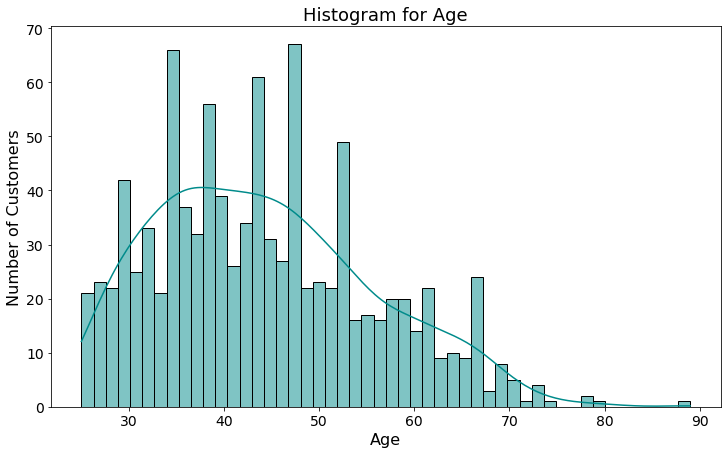

In [59]:
fig,axis = plt.subplots(1,1,figsize=(12,7))
s= bike_buyers["Age"].to_numpy()
sb.histplot(s,bins=50,kde=True,color='darkcyan')
# axis.set(title="Histogram of Age")
plt.title('Histogram for Age',fontsize=18)
plt.ylabel('Number of Customers',fontsize=16)
plt.xlabel('Age',fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

In [60]:
Age_PB = bike_buyers.loc[bike_buyers.Purchased_Bike == "Yes", "Age"]
Mean_PB = st.mean(Age_PB)
Median_PB = st.median(Age_PB)
Std_dev_PB =st.pstdev(Age_PB)
Min_Age_PB =min(Age_PB)
Max_Age_PB =max(Age_PB)
Q1_PB = np.percentile(Age_PB,25)
Q2_PB = np.percentile(Age_PB,50)
Q3_PB = np.percentile(Age_PB,75)
IQR = Q3_PB - Q1_PB

Age_nPB = bike_buyers.loc[bike_buyers.Purchased_Bike == "No", "Age"]
Mean_nPB = st.mean(Age_nPB)
Median_nPB = st.median(Age_nPB)
Std_dev_nPB =st.pstdev(Age_nPB)
Min_Age_nPB =min(Age_nPB)
Max_Age_nPB =max(Age_nPB)
Q1_nPB = np.percentile(Age_nPB,25)
Q2_nPB = np.percentile(Age_nPB,50)
Q3_nPB = np.percentile(Age_nPB,75)
IQRn = Q3_nPB - Q1_nPB

d_age = {"Statistics":["Mean","Median","Standard Deviation","Minimum Age","Maximum Age","Quantile 1 (25)","Quantile 2 (50)",
                  "Quantile 3 (75)","IQR"],
     "Purchased Bike":[Mean_PB,Median_PB,Std_dev_PB,Min_Age_PB,Max_Age_PB,Q1_PB,Q2_PB,Q3_PB,IQR],
     "Not Purchased Bike":[Mean_nPB,Median_nPB,Std_dev_nPB,Min_Age_nPB,Max_Age_nPB,Q1_nPB,Q2_nPB,Q3_nPB,IQRn]}
df_age = pd.DataFrame(data = d_age)
print("Statistical comparision of age between people who purchased bike and who did not")
print(df_age)

Statistical comparision of age between people who purchased bike and who did not
           Statistics  Purchased Bike  Not Purchased Bike
0                Mean       42.938819           45.383858
1              Median       41.000000           44.500000
2  Standard Deviation       10.127794           12.365349
3         Minimum Age       25.000000           25.000000
4         Maximum Age       78.000000           89.000000
5     Quantile 1 (25)       36.000000           35.000000
6     Quantile 2 (50)       41.000000           44.500000
7     Quantile 3 (75)       50.000000           55.000000
8                 IQR       14.000000           20.000000


#### Income

In [61]:
bike_buyers.Income.describe()

count       982.000000
mean      56181.262729
std       31171.155137
min       10000.000000
25%       30000.000000
50%       60000.000000
75%       70000.000000
max      170000.000000
Name: Income, dtype: float64

In [62]:
print(f"Mean of Income     = {st.mean(bike_buyers.Income):.2f}")
print(f"Median of Income   = {st.median(bike_buyers.Income):.2f}")
print(f"Variance of Income = {st.pvariance(bike_buyers.Income):.2f}")
print(f"Std_dev of Income  = {st.pstdev(bike_buyers.Income):.2f}")
print(f"Minimum Income     = {min(bike_buyers.Income)}")
print(f"Maximum Income     = {max(bike_buyers.Income)}")
print(f"Quartile 1 (25)    = {np.percentile(bike_buyers.Income,25)}")
print(f"Quartile 2 (50)    = {np.percentile(bike_buyers.Income,50)}")
print(f"Quartile 3 (75)    = {np.percentile(bike_buyers.Income,75)}")
print(f"IQR (Q3 - Q1)      = {np.percentile(bike_buyers.Income,75)-np.percentile(bike_buyers.Income,25)}")

Mean of Income     = 56181.26
Median of Income   = 60000.00
Variance of Income = 970651461.54
Std_dev of Income  = 31155.28
Minimum Income     = 10000.0
Maximum Income     = 170000.0
Quartile 1 (25)    = 30000.0
Quartile 2 (50)    = 60000.0
Quartile 3 (75)    = 70000.0
IQR (Q3 - Q1)      = 40000.0


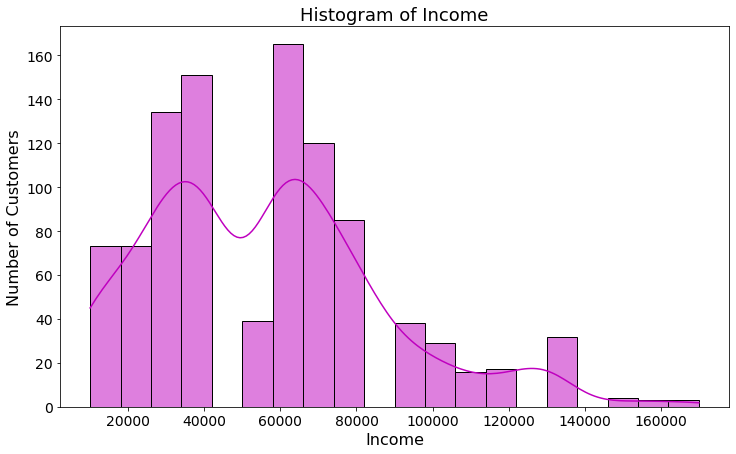

In [63]:
fig,axis = plt.subplots(1,1,figsize=(12,7))
s= bike_buyers["Income"].to_numpy()
sb.histplot(s,bins=20,kde=True,color='m')
# axis.set(title="Histogram for Income",xlabel="Income")
plt.title('Histogram of Income',fontsize=18)
plt.ylabel('Number of Customers',fontsize=16)
plt.xlabel('Income',fontsize=16)
plt.tick_params(labelsize=14)
plt.show()

In [64]:
Income_PB = bike_buyers.loc[bike_buyers.Purchased_Bike == "Yes", "Income"]
Mean_PB = st.mean(Income_PB)
Median_PB = st.median(Income_PB)
Std_dev_PB =st.pstdev(Income_PB)
Min_Income_PB =min(Income_PB)
Max_Income_PB =max(Income_PB)
Q1_PB = np.percentile(Income_PB,25)
Q2_PB = np.percentile(Income_PB,50)
Q3_PB = np.percentile(Income_PB,75)
IQR = Q3_PB - Q1_PB

Income_nPB = bike_buyers.loc[bike_buyers.Purchased_Bike == "No", "Income"]
Mean_nPB = st.mean(Income_nPB)
Median_nPB = st.median(Income_nPB)
Std_dev_nPB =st.pstdev(Income_nPB)
Min_Income_nPB =min(Income_nPB)
Max_Income_nPB =max(Income_nPB)
Q1_nPB = np.percentile(Income_nPB,25)
Q2_nPB = np.percentile(Income_nPB,50)
Q3_nPB = np.percentile(Income_nPB,75)
IQRn = Q3_nPB - Q1_nPB

d_Income = {"Statistics":["Mean","Median","Standard Deviation","Minimum Income","Maximum Income","Quantile 1 (25)",
                          "Quantile 2 (50)","Quantile 3 (75)","IQR"],
     "Purchased Bike":[Mean_PB,Median_PB,Std_dev_PB,Min_Income_PB,Max_Income_PB,Q1_PB,Q2_PB,Q3_PB,IQR],
     "Not Purchased Bike":[Mean_nPB,Median_nPB,Std_dev_nPB,Min_Income_nPB,Max_Income_nPB,Q1_nPB,Q2_nPB,Q3_nPB,IQRn]}
df_Income = pd.DataFrame(data = d_Income)
print("Statistical comparision of Income between people who purchased bike and who did not")
print(df_Income)

Statistical comparision of Income between people who purchased bike and who did not
           Statistics  Purchased Bike  Not Purchased Bike
0                Mean    57869.198312        54606.299213
1              Median    60000.000000        60000.000000
2  Standard Deviation    30926.204880        31285.491966
3      Minimum Income    10000.000000        10000.000000
4      Maximum Income   170000.000000       170000.000000
5     Quantile 1 (25)    40000.000000        30000.000000
6     Quantile 2 (50)    60000.000000        60000.000000
7     Quantile 3 (75)    70000.000000        70000.000000
8                 IQR    30000.000000        40000.000000


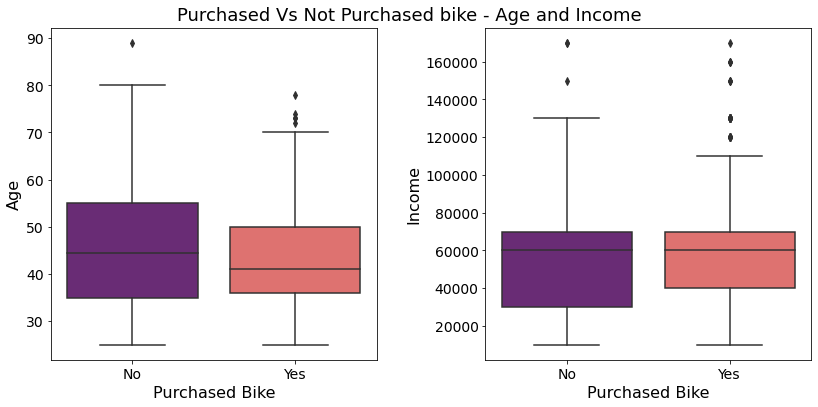

In [65]:
fig,axis = plt.subplots(1,2,figsize=(12,6))
plt.suptitle("Purchased Vs Not Purchased bike - Age and Income",fontsize=18)
sb.boxplot(ax=axis[0] , y='Age', x='Purchased_Bike', data=bike_buyers, palette='magma')
# axis[0].set(title="Comparing Age")
axis[0].set_ylabel('Age',fontsize=16)
axis[0].set_xlabel('Purchased Bike',fontsize=16)
axis[0].tick_params(labelsize=14)

sb.boxplot(ax=axis[1] , y='Income', x='Purchased_Bike', data=bike_buyers, palette='magma')
# axis[1].set(title="Comparing Income")
plt.ylabel('Income',fontsize=16)
plt.xlabel('Purchased Bike',fontsize=16)
plt.tick_params(labelsize=14)
plt.tight_layout(pad=3)
plt.show()

##### **Analysis - Age and Income**
The analysis of Age and Income between the people who purchased the bike and those who didn't purchased the bike has given us some useful insights. 

- When comparing the ages from both statistical analysis and the graph, we can conclude that most of the people who purchased the bike are younger compared to the group who didn't purchase the bike. 
- So, it is safer to conclude that people below 50 are more likely to buy a bike.
- On comparing the income for both groups, the central tendencies did not differ much. But, it is interesting to note the difference in quantile 1. 
- People who bought the bike are more likely to have an income above 4000$. 
- Though the income didn't have much impact on the purchase of the bike, people whose income is above a certain level are most likely to buy one.

#### Number of Cars

In [52]:
bike_buyers.Cars.describe()

count    982.000000
mean       1.442974
std        1.124424
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: Cars, dtype: float64

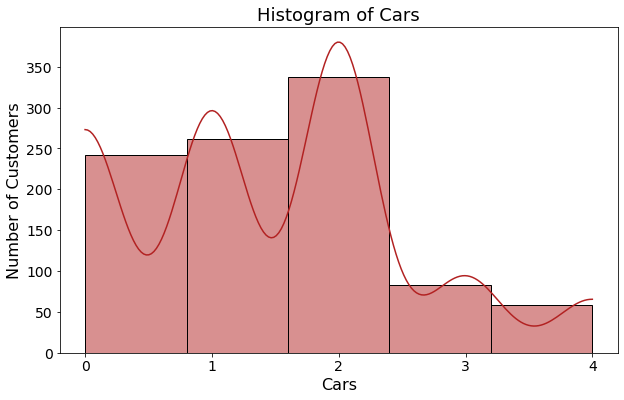

In [97]:
fig,axis = plt.subplots(1,1,figsize=(10,6))
s= bike_buyers["Cars"].to_numpy()
sb.histplot(s,bins=5,kde=True,color='firebrick')
# axis.set(title="Histogram for Income",xlabel="Income")
plt.title('Histogram of Cars',fontsize=18)
plt.ylabel('Number of Customers',fontsize=16)
plt.xlabel('Cars',fontsize=16)
plt.tick_params(labelsize=14)
axis.set_xticks([0,1,2,3,4])
# axis.set_xticklabels([0,1,2,3,4])
plt.show()

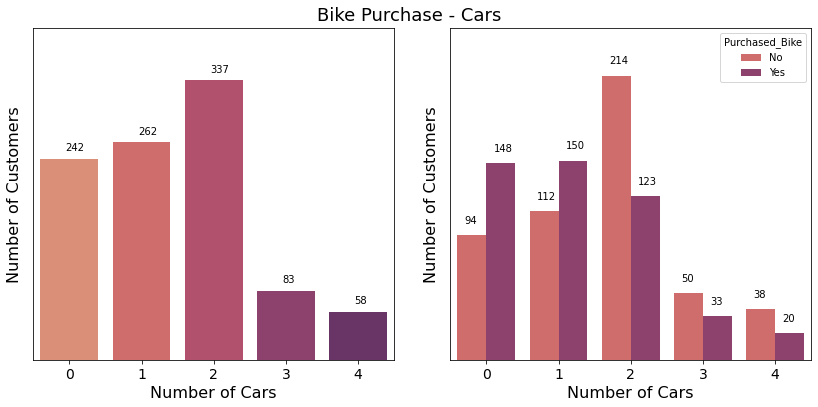

In [95]:
fig,axis = plt.subplots(1,2,figsize=(12,6))
plt.suptitle("Bike Purchase - Cars",fontsize=18)
ax = sb.countplot(ax=axis[0] ,x = "Cars",data=bike_buyers,palette='flare')
axis[0].set_ylabel('Number of Customers',fontsize=16)
axis[0].set_xlabel('Number of Cars',fontsize=16)
axis[0].set_ylim(top=400)
axis[0].set(yticklabels=[])  # remove the tick labels
axis[0].tick_params(left=False,labelsize=14)  # remove the ticks
axis[0].set_xticks([0,1,2,3,4])
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+10))

axx = sb.countplot(ax=axis[1] ,x = "Cars",hue="Purchased_Bike",data=bike_buyers,palette='flare')
axis[1].set_ylim(top=250)
axis[1].set_ylabel('Number of Customers',fontsize=16)
axis[1].set_xlabel('Number of Cars',fontsize=16)
axis[1].set(yticklabels=[])  # remove the tick labels
axis[1].tick_params(left=False,labelsize=14)  # remove the ticks
for p in axx.patches:
        axx.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+9))
plt.tight_layout(pad=3)
plt.show()

##### Number of Cars
It is not a surprise to see that the people who have fewer or no cars are highly interested in purchasing the bike. This feature could also have significance over bike purchasing.

#### Children

In [87]:
bike_buyers.Children.describe()

count    982.000000
mean       1.884929
std        1.621717
min        0.000000
25%        0.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: Children, dtype: float64

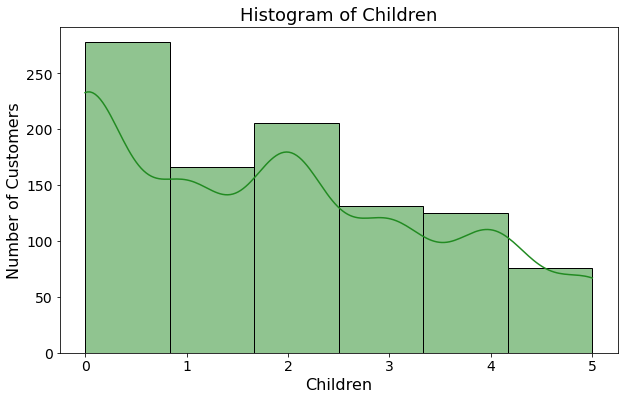

In [113]:
fig,axis = plt.subplots(1,1,figsize=(10,6))
s= bike_buyers["Children"].to_numpy()
sb.histplot(s,bins=6,kde=True,color='forestgreen')
# axis.set(title="Histogram for Income",xlabel="Income")
plt.title('Histogram of Children',fontsize=18)
plt.ylabel('Number of Customers',fontsize=16)
plt.xlabel('Children',fontsize=16)
plt.tick_params(labelsize=14)
# axis.set_xticks([0,1,2,3,4,5])
# axis.set_xticklabels([0,1,2,3,4])
plt.show()

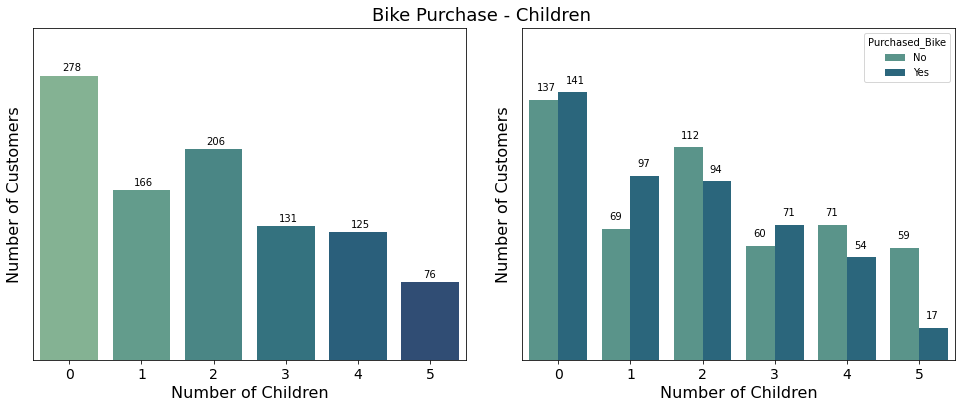

In [119]:
fig,axis = plt.subplots(1,2,figsize=(14,6))
plt.suptitle("Bike Purchase - Children",fontsize=18)
ax = sb.countplot(ax=axis[0] ,x = "Children",data=bike_buyers,palette='crest')

axis[0].set_ylabel('Number of Customers',fontsize=16)
axis[0].set_xlabel('Number of Children',fontsize=16)
axis[0].set_ylim(top=325)
axis[0].set(yticklabels=[])  # remove the tick labels
axis[0].tick_params(left=False,labelsize=14)  # remove the ticks
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+5))

axx = sb.countplot(ax=axis[1] ,x = "Children",hue="Purchased_Bike",data=bike_buyers,palette='crest')
axis[1].set_ylim(top=175)
axis[1].set_ylabel('Number of Customers',fontsize=16)
axis[1].set_xlabel('Number of Children',fontsize=16)

axis[1].set(yticklabels=[])  # remove the tick labels
axis[1].tick_params(left=False,labelsize=14)  # remove the ticks
for p in axx.patches:
        axx.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))
plt.tight_layout(pad=3)
plt.show()

##### Number of Children
It is surprising to see a significant difference in bike purchasing between people who have fewer or no children vs people with more children. 
- People with no or one child scored a higher percentage in purchasing the bike compared to others. 
- The least ones are people with more children. 

The number of children does impact the probability of buying a bike.

### Bike Purchase - Category

#### Gender

In [28]:
Male = len(bike_buyers.loc[bike_buyers.Gender == "Male","Gender"])
Female = len(bike_buyers.loc[bike_buyers.Gender == "Female","Gender"])
Male_PB = len(bike_buyers.loc[(bike_buyers["Gender"] == "Male") & (bike_buyers["Purchased_Bike"] == "Yes"),"Gender"])
Female_PB = len(bike_buyers.loc[(bike_buyers["Gender"] == "Female") & (bike_buyers["Purchased_Bike"] == "Yes"),"Gender"])
Male_nPB = len(bike_buyers.loc[(bike_buyers["Gender"] == "Male") & (bike_buyers["Purchased_Bike"] == "No"),"Gender"])
Female_nPB = len(bike_buyers.loc[(bike_buyers["Gender"] == "Female") & (bike_buyers["Purchased_Bike"] == "No"),"Gender"])
fem_PB = (Female_PB / Female)*100
M_PB = (Male_PB / Male)*100
fem_nPB = (Female_nPB / Female)*100
M_nPB = (Male_nPB / Male)*100
print("Gender Analysis")
print(f"Total Number of Male   = {Male}")
print(f"Total Number of Female = {Female}")
print(f"Percentage of people who purchased bike\nMale   = {M_PB:.2f} %\nFemale = {fem_PB:.2f} %")
print(f"Percentage of people who did not purchase bike\nMale   = {M_nPB:.2f} %\nFemale = {fem_nPB:.2f} %")

Gender Analysis
Total Number of Male   = 494
Total Number of Female = 488
Percentage of people who purchased bike
Male   = 47.77 %
Female = 48.77 %
Percentage of people who did not purchase bike
Male   = 52.23 %
Female = 51.23 %


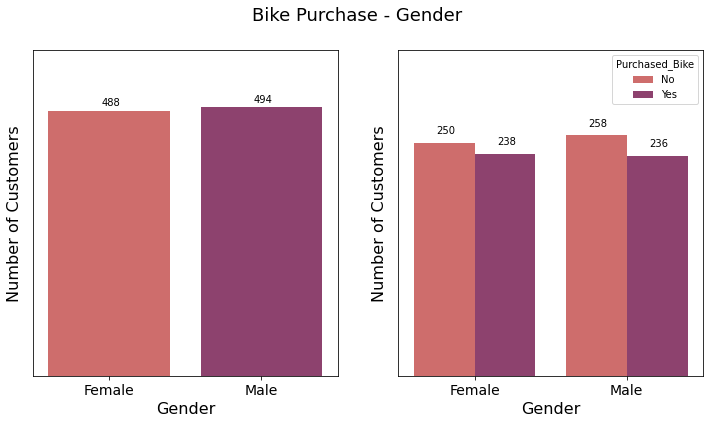

In [137]:
fig,axis = plt.subplots(1,2,figsize=(12,6))
plt.suptitle("Bike Purchase - Gender",fontsize=18)
ax = sb.countplot(ax=axis[0] ,x = "Gender",data=bike_buyers,palette='flare')
axis[0].set_ylabel('Number of Customers',fontsize=16)
axis[0].set_xlabel('Gender',fontsize=16)
axis[0].set(yticklabels=[])  # remove the tick labels
axis[0].tick_params(left=False,labelsize=14)  # remove the ticks
axis[0].set_ylim(top=600)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+10))

axx = sb.countplot(ax=axis[1] ,x = "Gender",hue="Purchased_Bike",data=bike_buyers,palette='flare')
axis[1].set_ylim(top=350)
axis[1].set_ylabel('Number of Customers',fontsize=16)
axis[1].set_xlabel('Gender',fontsize=16)
axis[1].set(yticklabels=[])  # remove the tick labels
axis[1].tick_params(left=False,labelsize=14)  # remove the ticks
for p in axx.patches:
        axx.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+10))
plt.show()


##### Analysis - Gender
With the help of analysis and the graph, it is fascinating to see that both males and females are equally interested to purchase the bike and over half the population purchased the bike regardless of gender. Being male or female doesn't stop them from purchasing the bike.

#### Marital Status

In [30]:
marry = len(bike_buyers.loc[bike_buyers.Marital_Status == "Married","Marital_Status"])
single = len(bike_buyers.loc[bike_buyers.Marital_Status == "Single","Marital_Status"])
marry_PB = len(bike_buyers.loc[(bike_buyers["Marital_Status"] == "Married") & (bike_buyers["Purchased_Bike"] == "Yes"),"Marital_Status"])
single_PB = len(bike_buyers.loc[(bike_buyers["Marital_Status"] == "Single") & (bike_buyers["Purchased_Bike"] == "Yes"),"Marital_Status"])
marry_nPB = len(bike_buyers.loc[(bike_buyers["Marital_Status"] == "Married") & (bike_buyers["Purchased_Bike"] == "No"),"Marital_Status"])
single_nPB = len(bike_buyers.loc[(bike_buyers["Marital_Status"] == "Single") & (bike_buyers["Purchased_Bike"] == "No"),"Marital_Status"])
sin_PB = (single_PB / single)*100
mar_PB = (marry_PB / marry)*100
sin_nPB = (single_nPB / single)*100
mar_nPB = (marry_nPB / single)*100
print("Marital_Status Analysis")
print(f"Total Number of Married   = {marry}")
print(f"Total Number of Single = {single}")
print(f"Percentage of people who purchased bike\nMarried = {mar_PB:.2f}%\nSingle  = {sin_PB:.2f}%")
print(f"Percentage of people who did not purchase bike\nMarried = {mar_nPB:.2f}%\nSingle  = {sin_nPB:.2f}%")

Marital_Status Analysis
Total Number of Married   = 527
Total Number of Single = 455
Percentage of people who purchased bike
Married = 43.07%
Single  = 54.29%
Percentage of people who did not purchase bike
Married = 65.93%
Single  = 45.71%


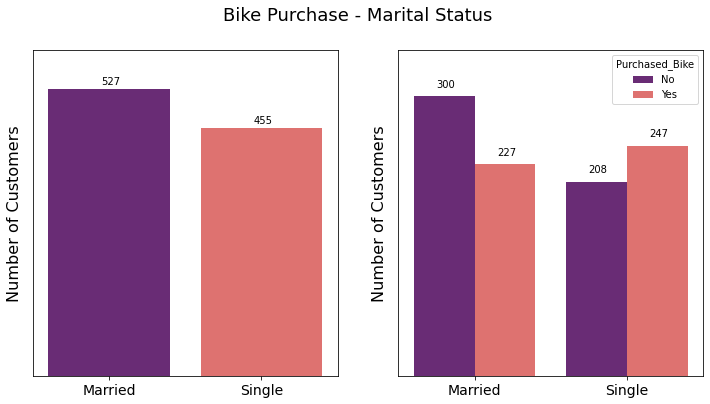

In [146]:
fig,axis = plt.subplots(1,2,figsize=(12,6))
plt.suptitle("Bike Purchase - Marital Status",fontsize=18)
ax = sb.countplot(ax=axis[0] ,x = "Marital_Status",data=bike_buyers,palette='magma')
axis[0].set_ylabel('Number of Customers',fontsize=16)
axis[0].set_xlabel('')
axis[0].set(yticklabels=[])  # remove the tick labels
axis[0].tick_params(left=False,labelsize=14)  # remove the ticks
axis[0].set_ylim(top=600)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+10))

axx = sb.countplot(ax=axis[1] ,x = "Marital_Status",hue="Purchased_Bike",data=bike_buyers,palette='magma')
axis[1].set_ylim(top=350)
axis[1].set_ylabel('Number of Customers',fontsize=16)
axis[1].set_xlabel('')
axis[1].set(yticklabels=[])  # remove the tick labels
axis[1].tick_params(left=False,labelsize=14)  # remove the ticks
for p in axx.patches:
        axx.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+10))
plt.show()

##### Marital Status Analysis
With the help of the graph and the analysis, we can see that the people who are single bought more bikes compared to married ones. More than half the number of single people bought the bike and that is 10% higher than the married people.

#### Home Owners

In [31]:
own = len(bike_buyers.loc[bike_buyers.Home_Owners == "Yes","Home_Owners"])
n_own = len(bike_buyers.loc[bike_buyers.Home_Owners == "No","Home_Owners"])
own_PB = len(bike_buyers.loc[(bike_buyers["Home_Owners"] == "Yes") & (bike_buyers["Purchased_Bike"] == "Yes"),"Home_Owners"])
nown_PB = len(bike_buyers.loc[(bike_buyers["Home_Owners"] == "No") & (bike_buyers["Purchased_Bike"] == "Yes"),"Home_Owners"])
own_nPB = len(bike_buyers.loc[(bike_buyers["Home_Owners"] == "Yes") & (bike_buyers["Purchased_Bike"] == "No"),"Home_Owners"])
nown_nPB = len(bike_buyers.loc[(bike_buyers["Home_Owners"] == "No") & (bike_buyers["Purchased_Bike"] == "No"),"Home_Owners"])

owner_PB = (own_PB / own)*100
nowner_PB = (nown_PB / n_own)*100
owner_nPB = (own_nPB / own)*100
nowner_nPB = (nown_nPB / n_own)*100

print("Home Owners Analysis")
print(f"Total Number of Home Owners   = {own}")
print(f"Total Number of Non Home Owners = {n_own}")
print(f"Percentage of people who purchased bike\nOwners     = {owner_PB:.2f}%\nNon Owners = {nowner_PB:.2f}%")
print(f"Percentage of people who did not purchase bike\nMarried    = {owner_nPB:.2f}%\nNon Owners = {nowner_nPB:.2f}%")

Home Owners Analysis
Total Number of Home Owners   = 670
Total Number of Non Home Owners = 312
Percentage of people who purchased bike
Owners     = 47.31%
Non Owners = 50.32%
Percentage of people who did not purchase bike
Married    = 52.69%
Non Owners = 49.68%


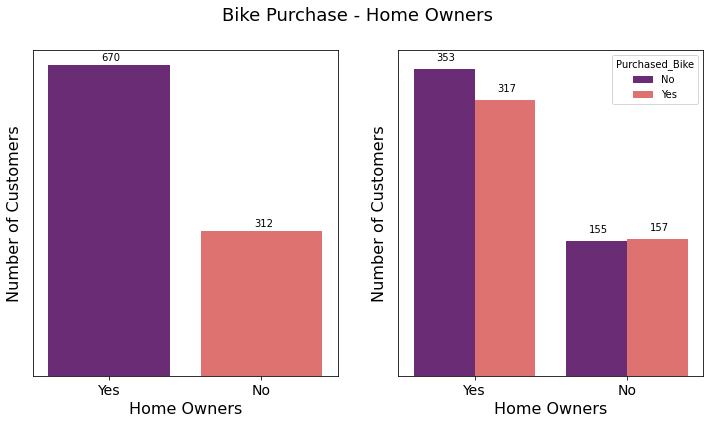

In [151]:
fig,axis = plt.subplots(1,2,figsize=(12,6))
plt.suptitle("Bike Purchase - Home Owners",fontsize=18)
ax = sb.countplot(ax=axis[0] ,x = "Home_Owners",data=bike_buyers,palette='magma')
axis[0].set_ylabel('Number of Customers',fontsize=16)
axis[0].set_xlabel('Home Owners',fontsize=16)
axis[0].set(yticklabels=[])  # remove the tick labels
axis[0].tick_params(left=False,labelsize=14)  # remove the ticks
# axis[0].set_ylim(top=600)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+10))

axx = sb.countplot(ax=axis[1] ,x = "Home_Owners",hue="Purchased_Bike",data=bike_buyers,palette='magma')
axis[1].set_ylim(top=375)
axis[1].set_ylabel('Number of Customers',fontsize=16)
axis[1].set_xlabel('Home Owners',fontsize=16)
axis[1].set(yticklabels=[])  # remove the tick labels
axis[1].tick_params(left=False,labelsize=14)  # remove the ticks
for p in axx.patches:
        axx.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+10))
plt.show()

##### Home Owners Analysis
We can see from the graph that with the given population, more number of people own house. Among them, if we compare the percentage of people who bought the bike. It is evident that 50% of people who don't have a house are interested in the bike, which is a slightly higher percentage compared to people who are owners. 

#### Education

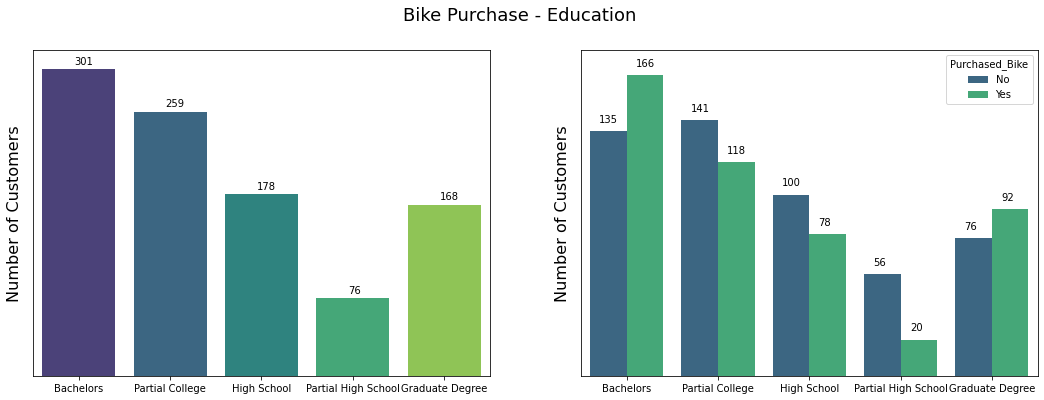

In [183]:
fig,axis = plt.subplots(1,2,figsize=(18,6))
plt.suptitle("Bike Purchase - Education",fontsize=18)
ax = sb.countplot(ax=axis[0] ,x = "Education",data=bike_buyers,palette='viridis')
axis[0].set_ylabel('Number of Customers',fontsize=16)
axis[0].set_xlabel('')
axis[0].set(yticklabels=[])  # remove the tick labels
axis[0].tick_params(left=False)  # remove the ticks
axis[0].set_ylim(top=320)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+5))

axx = sb.countplot(ax=axis[1] ,x = "Education",hue="Purchased_Bike",data=bike_buyers,palette='viridis')
axis[1].set_ylim(top=180)
axis[1].set_ylabel('Number of Customers',fontsize=16)
axis[1].set_xlabel('')
axis[1].set(yticklabels=[])  # remove the tick labels
axis[1].tick_params(left=False)  # remove the ticks
for p in axx.patches:
        axx.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))
plt.show()

##### Education
With the help of the graph, we can see that more than 50% of people who hava bachelor's or graduate degrees bought a bike. And the people who didn't complete high school don't seem to have much interested in purchasing a bike.

#### Occupation

In [207]:
v,f=np.unique(bike_buyers['Occupation'],return_counts=True)

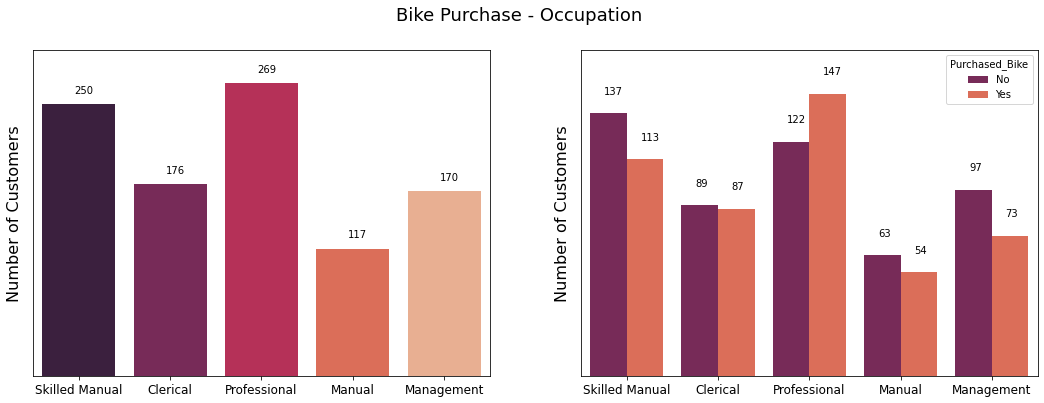

In [211]:
fig,axis = plt.subplots(1,2,figsize=(18,6))
plt.suptitle("Bike Purchase - Occupation",fontsize=18)
ax = sb.countplot(ax=axis[0] ,x = "Occupation",data=bike_buyers,palette='rocket')
axis[0].set_ylabel('Number of Customers',fontsize=16)
axis[0].set_xlabel('')
axis[0].set(yticklabels=[])  # remove the tick labels
axis[0].tick_params(left=False,labelsize=12)  # remove the ticks
axis[0].set_ylim(top=300)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+10))

axx = sb.countplot(ax=axis[1] ,x = "Occupation",hue="Purchased_Bike",data=bike_buyers,palette='rocket')
axis[1].set_ylim(top=170)
axis[1].set_ylabel('Number of Customers',fontsize=16)
axis[1].set_xlabel('')
axis[1].set(yticklabels=[])  # remove the tick labels
axis[1].tick_params(left=False,labelsize=12)  # remove the ticks
for p in axx.patches:
        axx.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+10))
plt.show()

##### Occupation
Upon seeing whether the person's occupation has an impact on purchasing a bike, we can see that people who are professionals bought more bikes compared to others. And people who are in Management and Manual have the least percentage. 

#### Region

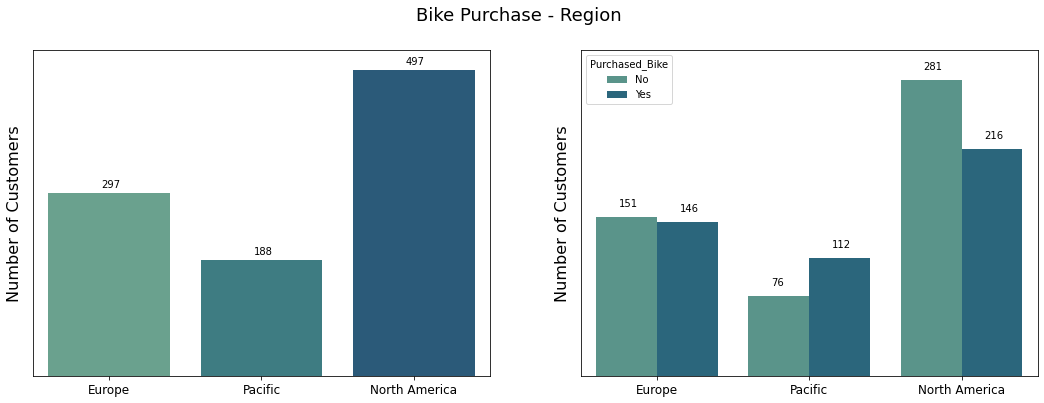

In [196]:
fig,axis = plt.subplots(1,2,figsize=(18,6))
plt.suptitle("Bike Purchase - Region",fontsize=18)
ax = sb.countplot(ax=axis[0] ,x = "Region",data=bike_buyers,palette='crest')
axis[0].set_ylabel('Number of Customers',fontsize=16)
axis[0].set_xlabel('')
axis[0].set(yticklabels=[])  # remove the tick labels
axis[0].tick_params(left=False,labelsize=12)  # remove the ticks
axis[0].set_ylim(top=530)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+10))

axx = sb.countplot(ax=axis[1] ,x = "Region",hue="Purchased_Bike",data=bike_buyers,palette='crest')
axis[1].set_ylim(top=310)
axis[1].set_ylabel('Number of Customers',fontsize=16)
axis[1].set_xlabel('')
axis[1].set(yticklabels=[])  # remove the tick labels
axis[1].tick_params(left=False,labelsize=12)  # remove the ticks
for p in axx.patches:
        axx.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+10))
plt.show()

##### Region
From the above graph, we can see that though North Americans customers are higher, they have less percentage of purchase compared to the people from other regions. 

#### Commute Distance

/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(
/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1374: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


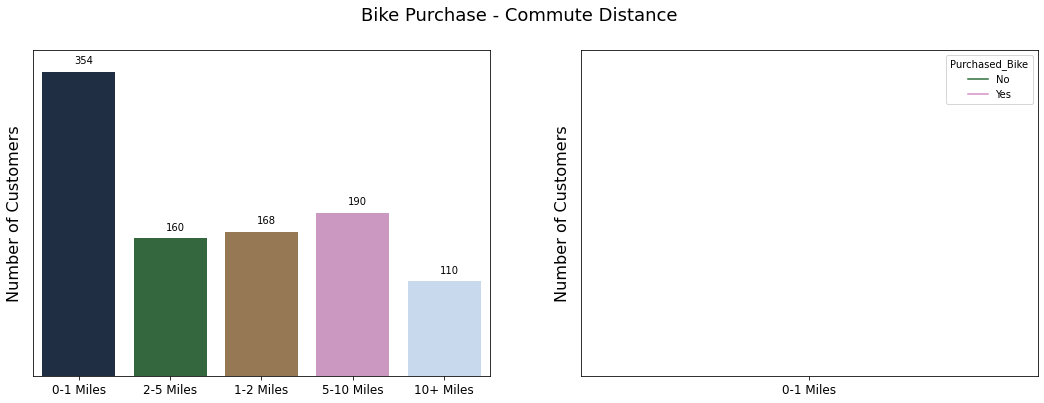

In [204]:
fig,axis = plt.subplots(1,2,figsize=(18,6))
plt.suptitle("Bike Purchase - Commute Distance",fontsize=18)
ax = sb.countplot(ax=axis[0] ,x = "Commute_Distance",data=bike_buyers,palette='cubehelix')
axis[0].set_ylabel('Number of Customers',fontsize=16)
axis[0].set_xlabel('')
axis[0].set(yticklabels=[])  # remove the tick labels
axis[0].tick_params(left=False,labelsize=12)  # remove the ticks
axis[0].set_ylim(top=380)
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+10))

axx = sb.countplot(ax=axis[1] ,x = "Commute_Distance",hue="Purchased_Bike",data=bike_buyers,palette='cubehelix')
axis[1].set_ylim(top=220)
axis[1].set_ylabel('Number of Customers',fontsize=16)
axis[1].set_xlabel('')
axis[1].set(yticklabels=[])  # remove the tick labels
axis[1].tick_params(left=False,labelsize=12)  # remove the ticks
for p in axx.patches:
        axx.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+10))
plt.show()

##### Commute Distance
From the graph, it is evident that the people who have less commute distance are more interested in purchasing the bike. This could be one of the important criteria to concentrate on. 

#### Age & Income Vs Occupation

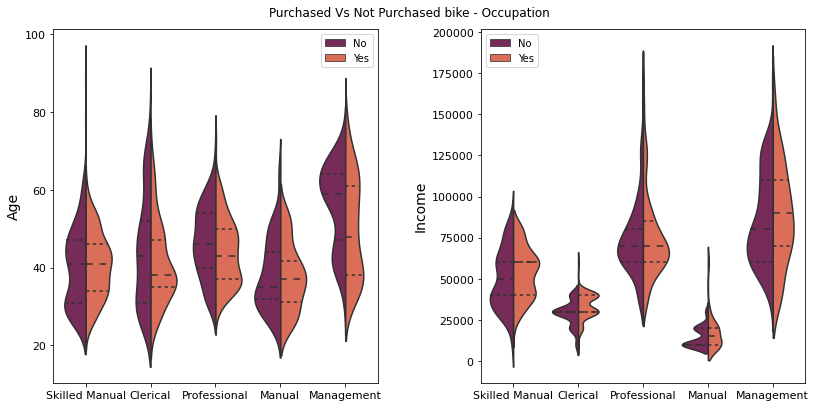

In [203]:
fig,axis = plt.subplots(1,2,figsize=(12,6))
plt.suptitle("Purchased Vs Not Purchased bike - Occupation")
sb.violinplot(ax=axis[0] ,data=bike_buyers,x="Occupation",y="Age",hue="Purchased_Bike",split=True,inner="quart",palette='rocket')
axis[0].legend(loc='best')
axis[0].set_ylabel('Age',fontsize=14)
axis[0].tick_params(labelsize=11)
axis[0].set_xlabel('')
sb.violinplot(ax=axis[1] ,data=bike_buyers,x="Occupation",y="Income",hue="Purchased_Bike",split=True,inner="quart",palette='rocket')
axis[1].legend(loc='upper left')
axis[1].tick_params(labelsize=11)
axis[1].set_ylabel('Income',fontsize=14)
axis[1].set_xlabel('')
plt.tight_layout(pad=3)
plt.show()

##### Age vs Occupation
- From this interesting plot, we can see that more people are interested to buy bikes between the ages of 30-50 regardless of their occupation. 
- But, in Management more people are more than 50 years, so they are less likely to purchase the bike.
##### Income vs Occupation
- With the help of this graph, we can understand that the income of clerical and manual occupation have less income and that could be a factor affecting their decision in buying a bike. 
- On the other hand, people who are doing jobs as skilled manual and professionals have high income comparatively and they are more likely to buy a bike.

### Conclusion 
The descriptive analysis of the Bike Purchasing dataset has provided useful insight that could help the company to understand their customers and to build strategy accordingly to improve their sales. The features that have a significant impact on their sales are:
1. Commute Distance
2. Number of Children
3. Number of Cars
4. Age

The features that have a moderate impact are:
1. Education
2. Occupation
3. Marital Status
4. Region

The features that have no or less impact are:
1. Gender
2. Home Owners
3. Income

These insights will help the company to make good decisions regarding their product and business strategy.